In [9]:
import pandas as pd
import requests
import numpy as np
from datetime import datetime, date
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

In [10]:
API = "http://localhost:8000/"

# Stars by birthyear = 1967

In [11]:
year = 1967
dfStarsby_birthyear = pd.read_json(API+f"stars/by_birthyear/{year}")
dfStarsby_birthyear

,name,birthdate,id
0,Adewale Akinnuoye-Agbaje,1967-01-01,15382
1,Akshay Kumar,1967-01-01,474774
2,Al Palagonia,1967-01-01,657330
3,Aleksandrs Petukhovs,1967-01-01,1319840
4,Alexandra Powers,1967-01-01,694490
...,...,...,...
107,Velizar Binev,1967-01-01,82870
108,Vendela Kirsebom,1967-01-01,456971
109,Vin Diesel,1967-07-18,4874
110,Will Ferrell,1967-01-01,2071


# Stats by title part

In [17]:
title = "die"
dfStats_title_part = pd.read_json(API+f"movies/by_title_part/?t={title}")
dfStats_title_part

,title,year,duration,id
0,Buffalo Soldiers,2001,98,252299
1,D&Diesel,2015,30,5540044
2,Die Another Day,2002,133,246460
3,Eddie Presley,1992,106,106793
4,Live and Let Die,1973,121,70328
5,Soldier in the Rain,1963,88,57517
6,Soldiers,2014,108,1286146
7,The Horse Soldiers,1959,120,52902
8,To Die For,1995,106,114681
9,Tomorrow Never Dies,1997,119,120347


# Stats par acteur

In [18]:
response = requests.get(API+f"stars/stats_movie_by_stars/")
data_json = response.json()

In [21]:
data_flatten = [ {**director_dict, 'Nombre films': nb_films, 'First film': first_film, 'Last film': last_film}  
         for director_dict, nb_films, first_film, last_film in data_json ]

In [23]:
dfStats_actors = pd.DataFrame(data_flatten)
dfStats_actors

,id,birthdate,name,Nombre films,First film,Last film
0,78,1907-05-26,John Wayne,172,1926,1976
1,1230,1884-03-16,Harrison Ford,86,1915,1932
2,125,1930-08-25,Sean Connery,73,1954,2012
3,230,1946-07-06,Sylvester Stallone,73,1969,2019
4,158,1956-07-09,Tom Hanks,69,1980,2020
...,...,...,...,...,...,...
161,915618,1939-01-01,Patrick Wayne,10,1950,1971
162,919798,1946-01-01,Frank Welker,10,1981,2019
163,936728,1905-01-01,Grant Withers,10,1943,1955
164,1055413,1977-01-01,Michael Fassbender,10,2001,2017


# Graphes star year/ movie year

In [59]:
limit = 50000
dfStars = pd.read_json(API+f'stars?limit={limit}', convert_dates=['birthdate'])
dfStars.set_index('id', inplace=True)
dfStars

,name,birthdate
id,,
1,Fred Astaire,1899-01-01
2,Lauren Bacall,1924-01-01
3,Brigitte Bardot,1934-01-01
4,John Belushi,NaT
6,Ingrid Bergman,1915-01-01
...,...,...
11722275,Joel Newsom,NaT
11749099,Elizabeth Alexander,NaT
11749100,Hans Van Buhofer,NaT


In [61]:
limit = 1500
dfMovies = pd.read_json(API+f'movies?limit={limit}')
dfMovies.set_index('id', inplace=True)
dfMovies

,title,year,duration
id,,,
5257,Excuse Me,1915,50.0
6366,Anton the Terrible,1916,50.0
8351,The Mysterious Mrs. Musslewhite,1917,50.0
8384,On the Level,1917,50.0
8642,The Sunset Trail,1917,50.0
...,...,...,...
11744604,Guardians of Life,2020,3.0
11833768,Neil Cicierega: Wow Wow (Audio),2017,3.0
11885402,Dan Aykroyd and Tom Hanks: City of Crime,1987,NaN


In [62]:
dfCountStarByYear = dfStars[~dfStars.birthdate.isna()].groupby(pd.Grouper(key='birthdate', freq='Y')).count()
dfCountMoviesByYear = dfMovies.groupby(pd.Grouper(key='year')).count()[['title']]
dfCountStarByYear 

,name
birthdate,
1846-12-31,1
1847-12-31,0
1848-12-31,2
1849-12-31,1
1850-12-31,1
...,...
2005-12-31,2
2006-12-31,1
2007-12-31,0


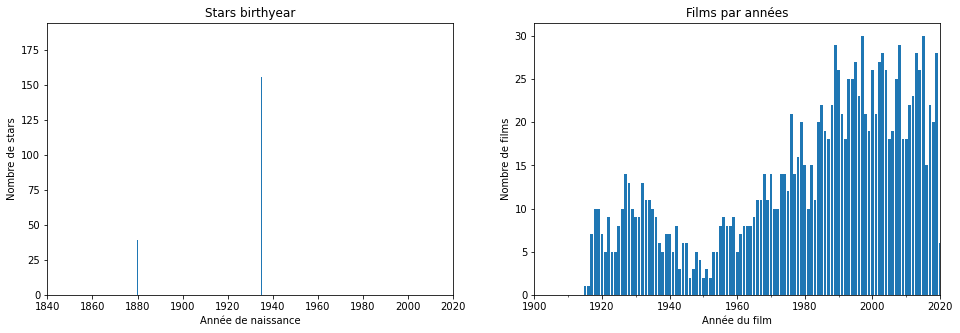

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))

ax1.bar(dfCountStarByYear.index, dfCountStarByYear.name)
ax1.set_title('Stars anniversaire')
ax1.set_xlabel('Année de naissance')
ax1.set_ylabel('Nombre de stars')
ax1.set_xlim(datetime(1840,1,1), datetime(2020,1,1))

ax2.bar(dfCountMoviesByYear.index, dfCountMoviesByYear.title)
ax2.set_title("Films par années")
ax2.set_xlabel("Année du film")
ax2.set_ylabel("Nombre de films")
ax2.set_xlim(1900, 2020)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(10))

# Top 10 acteurs

In [79]:
response = requests.get(API+f'stars/stats_movie_by_stars')
response
if response.status_code == 200:
    print('Response OK')
else:
    print('Error', response.status_code, response.json(), sep=', ')
data_json = response.json()
data_flatten = [ {**actor_dict, 'movie_count': movie_count }  
         for actor_dict, movie_count, first_movie_year, last_movie_year in data_json ]
data_flatten
dfStatsActor_all = pd.DataFrame(data_flatten)
dfStatsActor_all

Response OK


,id,birthdate,name,movie_count
0,78,1907-05-26,John Wayne,172
1,1230,1884-03-16,Harrison Ford,86
2,125,1930-08-25,Sean Connery,73
3,230,1946-07-06,Sylvester Stallone,73
4,158,1956-07-09,Tom Hanks,69
...,...,...,...,...
161,915618,1939-01-01,Patrick Wayne,10
162,919798,1946-01-01,Frank Welker,10
163,936728,1905-01-01,Grant Withers,10
164,1055413,1977-01-01,Michael Fassbender,10


In [73]:
df10Actors = dfStatsActor_all[:10]
df10Actors

,id,birthdate,name,movie_count
0,78,1907-05-26,John Wayne,172
1,1230,1884-03-16,Harrison Ford,86
2,125,1930-08-25,Sean Connery,73
3,230,1946-07-06,Sylvester Stallone,73
4,158,1956-07-09,Tom Hanks,69
5,241,1960-10-18,Jean-Claude Van Damme,66
6,142,1930-05-31,Clint Eastwood,63
7,148,1942-07-13,Harrison Ford,63
8,216,1947-07-30,Arnold Schwarzenegger,56
9,226,1968-09-25,Will Smith,50


In [77]:
df10ActorsMovie = df10Actors[['name', 'movie_count']].set_index('name')

Text(0.5, 0, 'Top 10')

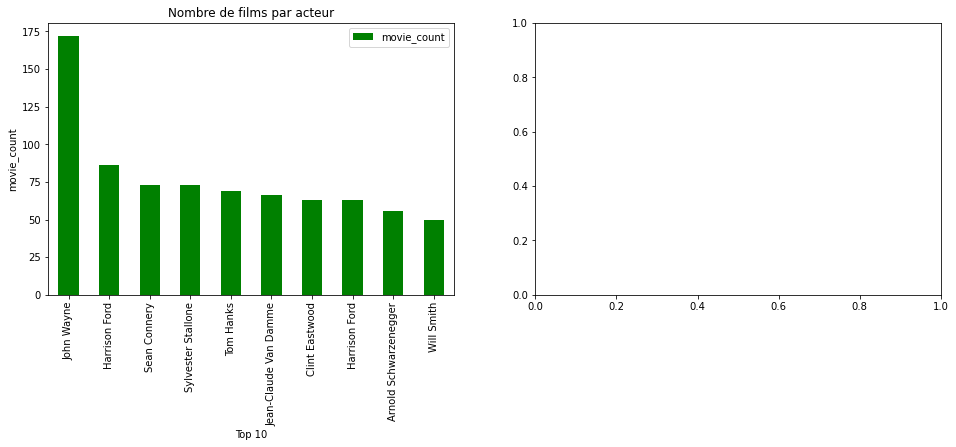

In [78]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))

df10ActorsMovie.plot(kind="bar", ax=ax1, color='green')
ax1.set_title("Nombre de films par acteur")
ax1.set_ylabel("movie_count")
ax1.set_xlabel("Top 10")